# Introduction:

## <b><u>Bank Churn Prediction</b></u>

## Objective:
Given a Bank Customer, build a neural-network based classifier that can determine whether they will leave or not in the next 6 months.

## Context:
Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities. 

## Data Description:
The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc. Link to the Kaggle project site: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

## Data Dictionary:
- RowNumber: Row number.
- CustomerId: Unique identification key for different customers.
- Surname: Surname of the customer
- Credit Score: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
- Geography: The country to which the customer belongs.
- Gender: The gender of the customer.
- Age: Age of the customer.
- Tenure: The period of time a customer has been associated with the bank.
- Balance: The account balance (the amount of money deposited in the bank account) of the customer.
- NumOfProducts: How many accounts, bank account affiliated products the person has.
- HasCrCard: Does the customer have a credit card through the bank?
- IsActiveMember: Subjective, but for the concept
- EstimatedSalary: Estimated salary of the customer.
- Exited: Did they leave the bank after all?

## Points Distribution:
The points distribution for this case is as follows:

1. Read the dataset
2. Drop the columns which are unique for all users like IDs (5 points)
3. Perform bivariate analysis and give your insights from the same (5 points) 
4. Distinguish the feature and target set and divide the data set into training and test sets (5 points)
5. Normalize the train and test data (10points)
6. Initialize & build the model. Identify the points of improvement and implement the same. (20)
7. Predict the results using 0.5 as a threshold (10points)
8. Print the Accuracy score and confusion matrix (5 points)

# Step 1. Import Libraries & Load Dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Check Tensorflow version
print(tf.__version__)

2.4.0


In [4]:
# Load dataset
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML-UOT/Project/Project 6/bank.csv')

In [5]:
# View dataset
data.head()

RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
0          1    15634602  Hargrave  ...               1       101348.88      1
1          2    15647311      Hill  ...               1       112542.58      0
2          3    15619304      Onio  ...               0       113931.57      1
3          4    15701354      Boni  ...               0        93826.63      0
4          5    15737888  Mitchell  ...               1        79084.10      0

[5 rows x 14 columns]

In [6]:
# Column Names 
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

> <b>'Exited' </b>column is the <b>target variable</b> in this dataset because we want to predict that given the various features, whether the customer exited/left the bank or not. 

In [7]:
# Drop column 'RowNumber' which is same as index and irrelevant for model
data.drop('RowNumber', axis = 1, inplace = True)

In [8]:
# Shape of dataset
data.shape

(10000, 13)

> This dataset has 10,000 rows/observations and 13 columns/features, after removing the row number column which is represented by the index of the dataset.

# Step 2. Data Analysis - EDA

## 2a. Dataset Analysis:

In [9]:
# Info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


> There are 10,000 non-null entries in all the columns with 2 float datatypes, 8 int datatypes and 3 object datatypes. Note that the object datatypes are for 'Surname', 'Geography', 'Gender' which contain string values.  

In [10]:
# Check missing values
data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

> There are no null/missing values in the dataset.

In [11]:
# Statistical Summary of dataset
data.describe().T

count          mean  ...           75%          max
CustomerId       10000.0  1.569094e+07  ...  1.575323e+07  15815690.00
CreditScore      10000.0  6.505288e+02  ...  7.180000e+02       850.00
Age              10000.0  3.892180e+01  ...  4.400000e+01        92.00
Tenure           10000.0  5.012800e+00  ...  7.000000e+00        10.00
Balance          10000.0  7.648589e+04  ...  1.276442e+05    250898.09
NumOfProducts    10000.0  1.530200e+00  ...  2.000000e+00         4.00
HasCrCard        10000.0  7.055000e-01  ...  1.000000e+00         1.00
IsActiveMember   10000.0  5.151000e-01  ...  1.000000e+00         1.00
EstimatedSalary  10000.0  1.000902e+05  ...  1.493882e+05    199992.48
Exited           10000.0  2.037000e-01  ...  0.000000e+00         1.00

[10 rows x 8 columns]

>Observations:
- All the columns have total 10,000 values.
- There are 0's as minimum value for 'Tenure', 'Balance', 'HasCrCard', 'IsActiveMember' and 'Exited'.
- 0's values for 'HasCrCard', 'IsActiveMember' and 'Exited' might mean that the customer has no credit card, is not an active member and has not exited the bank. However, the 0's for 'Tenure' and 'Balance' need more analysis. (However, 0 'Balance' might be significant for the decision to leave the bank or not)
- Median value for 'Balance' and 'EstimatedSalary' is greater than its mean values, which means it is right-skewed data. 
- Mean and median vary for 'HasCrCard', 'IsActiveMember' and 'Exited' which appear to be categorical features, and need more analysis. 

In [12]:
# Check unique values
data.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

> Observations:
- CustomerId has all unique/distinct values 10,000.
- Surname has 2932 values and total observations are 10,000 so some surnames are repeated. 
- Following are the 6 categorical columns/features: 'Geography', 'Gender', 'NumofProducts', 'HasCrCard', 'IsActiveMember', 'Exited' 

In [13]:
# Check Duplicated observations
data[data.duplicated()== True]

Empty DataFrame
Columns: [CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

In [14]:
# Check duplicate 'CustomerId' column
data[data['CustomerId'].duplicated() == True]

Empty DataFrame
Columns: [CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []

> There are no repeated observations and also no duplicate customerId i.e. all observations are unique.

## 2b. Univariate Analysis:

In [15]:
# Names of columns of dataset
cols = data.columns
print(cols)

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')


In [16]:
# Value counts of columns
for i in cols:
  print(data[i].value_counts())
  print(" ")

15812607    1
15741078    1
15635776    1
15740223    1
15738174    1
           ..
15743714    1
15639265    1
15641312    1
15684319    1
15695872    1
Name: CustomerId, Length: 10000, dtype: int64
 
Smith         32
Scott         29
Martin        29
Walker        28
Brown         26
              ..
Miranda        1
Bennelong      1
Sani           1
Threatt        1
Everingham     1
Name: Surname, Length: 2932, dtype: int64
 
850    233
678     63
655     54
705     53
667     53
      ... 
419      1
417      1
373      1
365      1
401      1
Name: CreditScore, Length: 460, dtype: int64
 
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
 
Male      5457
Female    4543
Name: Gender, dtype: int64
 
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64
 
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0 

>Observations:
<Br>Majority of the customers in the bank
- have 'Smith' as their surname.
- have Credit score of 850.
- belong to 'France'.
- are males.
- are 37 years old (Mostly 30-37 years). 
- stayed with the bank for a tenure of 2 years.
- have 0 balance in the bank, which looks suspicious so needs further analysis.
- have only 1 NumOfProducts, i.e. only one associated account with the bank.
- have a Credit Card with the bank and are active members of the bank.
- have not exited the bank yet. 

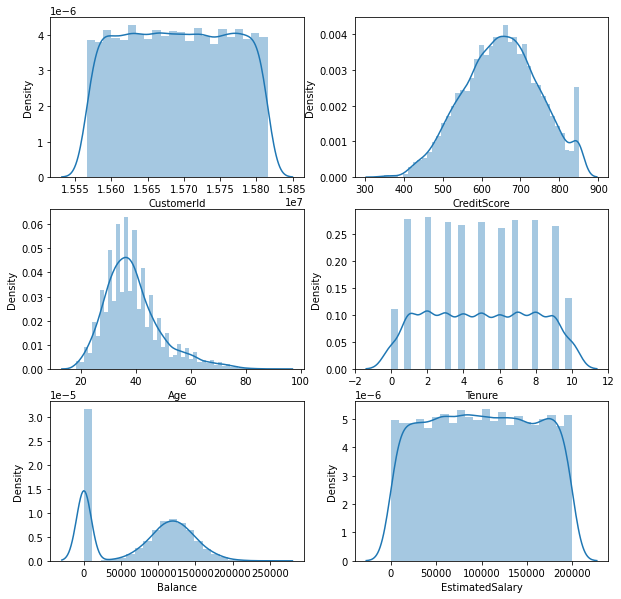

In [23]:
# Plot the attributes (distplot)
plt.figure(figsize = (10,10))
pos = 1
for i in ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance','EstimatedSalary']:
  plt.subplot(3,2, pos);
  sns.distplot(data[i]);
  pos +=1

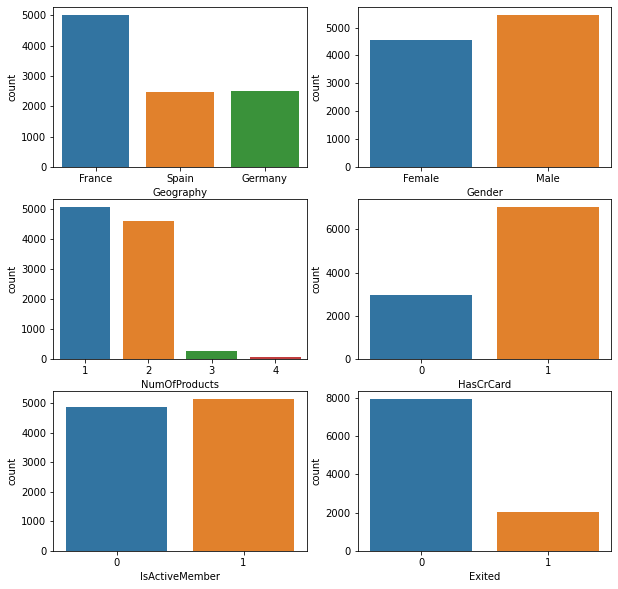

In [24]:
# Plot categorical attributes (countplot)
plt.figure(figsize = (10,10))
pos = 1
for i in ['Geography', 'Gender','NumOfProducts', 'HasCrCard', 'IsActiveMember','Exited']:
  plt.subplot(3,2, pos);
  sns.countplot(data[i]);
  pos +=1

> Observations:
- More customers in the dataset are from 'France' and are males. 
- Customers mostly have 1-2 banking accounts and have a credit cards. 
- Most customers are still with the bank.

In [19]:
# Skewed distribution
data.skew()

CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

> 'Exited' column has skewed distribution which means there is <b> class imbalance </b> in the target variable.

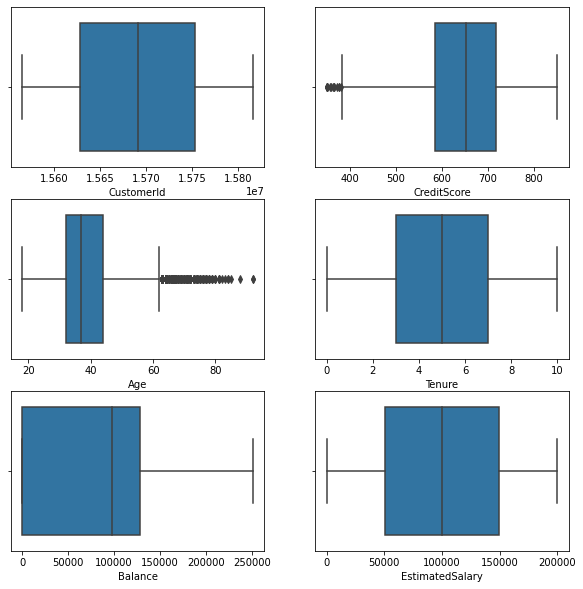

In [25]:
# Check outliers using boxplot
plt.figure(figsize = (10,10))
pos = 1
for i in ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance','EstimatedSalary']:
  plt.subplot(3,2, pos);
  sns.boxplot(data[i]);
  pos +=1

> There are no outliers that need to be treated.

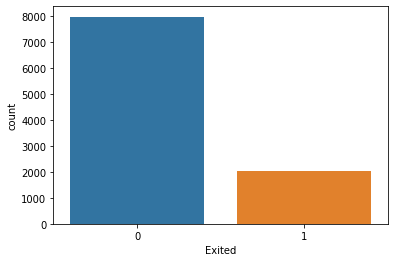

In [21]:
# Target Variable
sns.countplot(data['Exited']);

In [22]:
# Value counts for Target Variable
data['Exited'].value_counts(normalize = True)*100

0    79.63
1    20.37
Name: Exited, dtype: float64

> There are more observations for one class i.e. there is <b>class-imbalance</b>. About 79.63% of the customers are still with the bank (class-label 0) whereas the dataset records only 20.37% of the customers who have left the bank (churn) (class-label 1). 

## 2c. Bivariate Analysis:

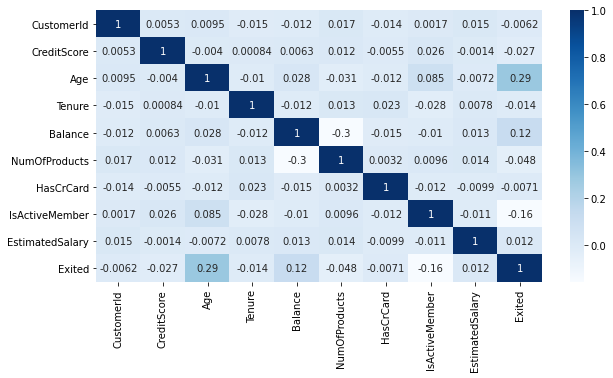

In [26]:
# Heatmap for correlation
plt.figure(figsize = (10,5));
sns.heatmap(data.corr(), annot = True, cmap = 'Blues', robust = True);

>Observations:
- 'Age' seems to have highest positive correlation with 'Exited'.
- 'IsActiveMember' seems to have highest negative correlation with 'Exited'.
- 'Balance' seems to have higher negative correlation with 'NumOfProducts'.

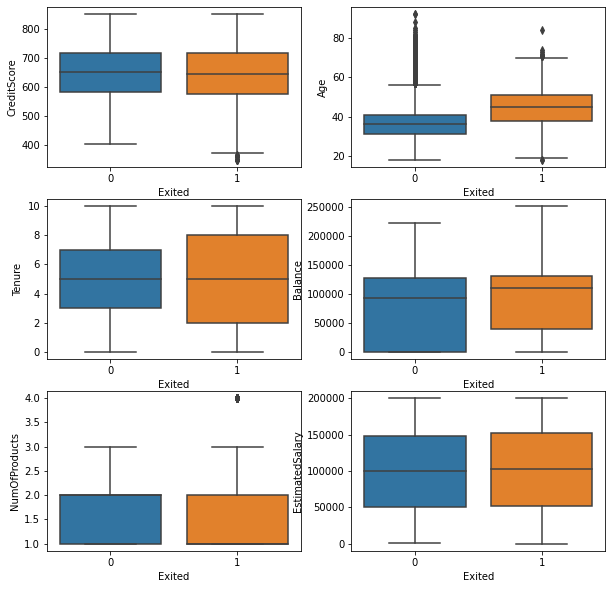

In [32]:
# Plot relationship (boxplot) of other attributes with Target variable
plt.figure(figsize = (10,10))
pos = 1
for i in ['CreditScore','Age','Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']:
  plt.subplot(3,2,pos)
  sns.boxplot(y = data[i], x = data['Exited']);
  pos +=1 

> Observations:
- 'CreditScore' does not seem to affect the decision of people leaving the bank significantly as the range of credit score for people who left the bank vs. people who did not leave the bank is similar.
- People who already exited the bank appear to be older than the ones who are still with the bank.
- People who have left the bank already seem to have stayed for a longer tenure.
- Other attributes like 'Balance', 'NumOfProducts' and 'EstimatedSalary' do not seem to affect the decision very much about leaving the bank. 

In [28]:
# Relationship of other attributes with Target variable
for i in ['Surname', 'Geography', 'Gender','NumOfProducts', 'HasCrCard', 'IsActiveMember']:
  print("Name of Attribute: {}".format(i))
  print(data.groupby('Exited')[i].describe())
  print(" ")


Name of Attribute: Surname
       count unique       top freq
Exited                            
0       7963   2616     Scott   26
1       2037   1188  McGregor    9
 
Name of Attribute: Geography
       count unique      top  freq
Exited                            
0       7963      3   France  4204
1       2037      3  Germany   814
 
Name of Attribute: Gender
       count unique     top  freq
Exited                           
0       7963      2    Male  4559
1       2037      2  Female  1139
 
Name of Attribute: NumOfProducts
         count      mean       std  min  25%  50%  75%  max
Exited                                                     
0       7963.0  1.544267  0.509536  1.0  1.0  2.0  2.0  3.0
1       2037.0  1.475209  0.801521  1.0  1.0  1.0  2.0  4.0
 
Name of Attribute: HasCrCard
         count      mean       std  min  25%  50%  75%  max
Exited                                                     
0       7963.0  0.707146  0.455101  0.0  0.0  1.0  1.0  1.0
1       2037

> Observations:
- There are only 2616 unique surnames among the customers with majority of customers who are still with the bank. People with surname as ' Scott' are the ones who are still with the bank and people with surnames as ' Smith' are the ones who have left the bank already. 
- Most customers who are still with the bank are from France and the ones who left the bank are from Germany.
- Customers who are still with the bank are mostly male and the ones who left the bank are mostly female, so gender really impacts their decision.
- About 50% of the customers who are still with the bank have about 2 accounts associated with the bank, however customers who have left the bank have 1 associated bank account. 
- About 50% of the customers who are still with the bank or have left the bank seem to have a credit card with the bank, so this does not affect their decision of leaving the bank.
- About 50% of the customers who are still with the bank are active members of the bank, whereas the ones who left the bank are not active members, which makes sense. 

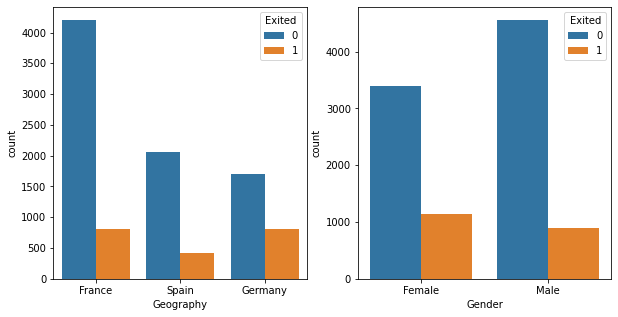

In [29]:
# How 'Geography' and 'Gender' impacts the churn/Target variable 'Exited'

plt.figure(figsize = (10,5))
pos = 1
for i in ['Geography', 'Gender']:
  plt.subplot(1,2,pos)
  sns.countplot(x = data[i], hue = data['Exited']);
  pos += 1

> Observations:
- Customers who left the bank are mostly females, and a large portion of the male customers in the dataset are still with the bank.
- Least number of customers from Spain left the bank and Maximum number of customers from France are still with the bank. 

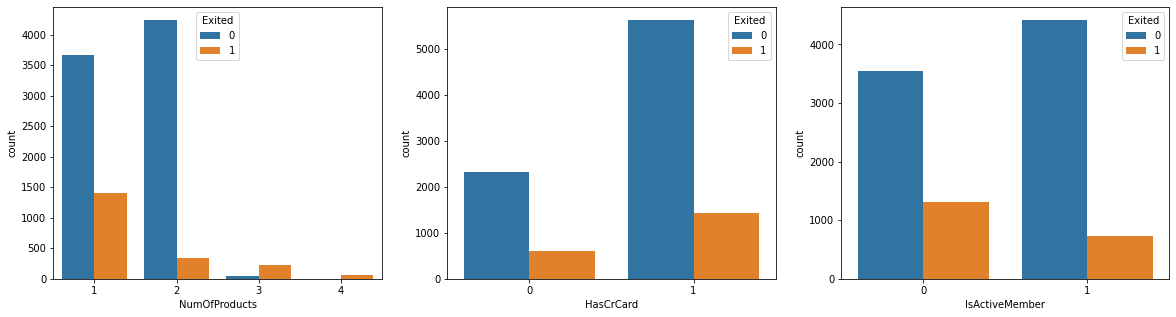

In [30]:
# How no. of banking accounts, having a credit card and 
# being an active member impacts the churn/Target variable 'Exited'

plt.figure(figsize = (20,5))
pos = 1
for i in ['NumOfProducts', 'HasCrCard', 'IsActiveMember']:
  plt.subplot(1,3,pos)
  sns.countplot(x = data[i], hue = data['Exited']);
  pos += 1

> Observations:
- Customers who left the bank had mostly 1 associated bank account whereas customers who are still with the bank have mostly 2 banking accounts.
- Customers who left the bank mostly had credit card whereas customers who are still with the bank also have a credit card. 
- Customers who left the bank mostly are not active members whereas customers who are still with the bank are active members.

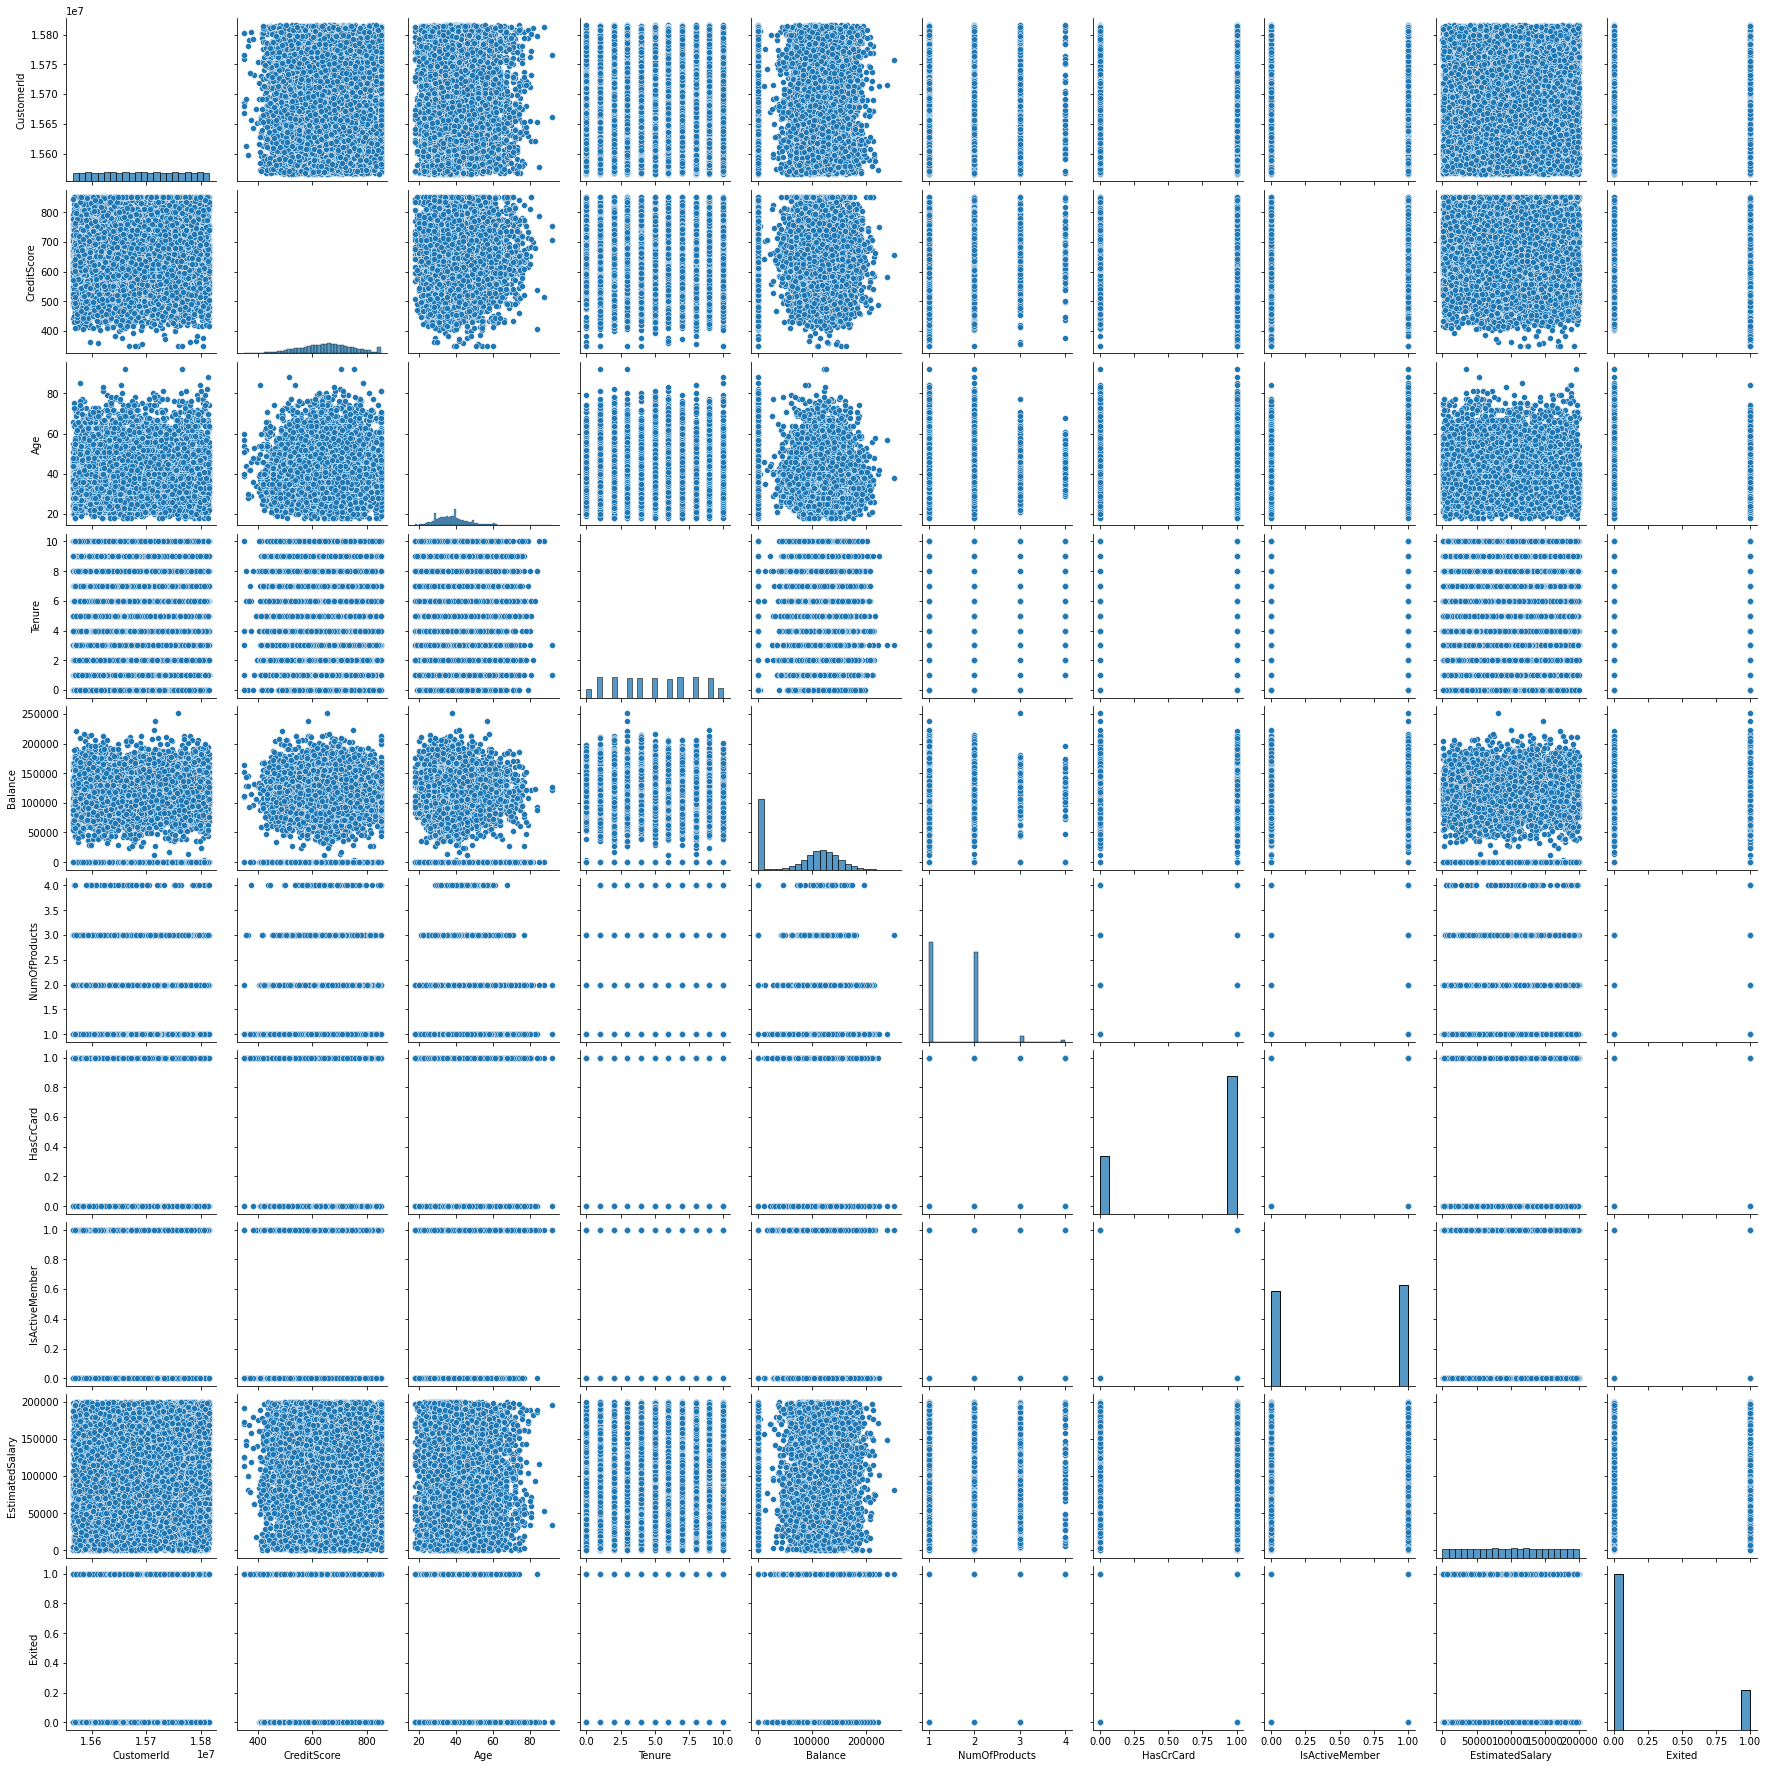

In [31]:
# Pair plot of all the features of dataset
sns.pairplot(data);

In [100]:
# Number of customers with 0 balance who churn or not
data[data['Balance'] == 0]['Exited'].value_counts()

0    3117
1     500
Name: Exited, dtype: int64

> Most of the customers with 0 Balance stay with the bank, hence having a 0 balance is not a reason for customer churn. So we keep these values.

In [101]:
# Number of customers with 0 Tenure who churn or not
data[data['Tenure'] == 0]['Exited'].value_counts()

0    318
1     95
Name: Exited, dtype: int64

> Most of the customers with 0 Tenure stay with the bank, hence having a 0 tenure is not a reason for customer churn. So we keep these values.

# Step 3. Data Preprocessing

In [33]:
# Check datatypes of dataset
data.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [34]:
# Prepare data
cols_to_drop = ['CustomerId', 'Exited', 'Surname']

# Create independent/feature variables
X = data.drop(cols_to_drop, axis =1)

# Create Target variable
Y = data['Exited'].values.reshape(-1,1)

In [35]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Geography'] = le.fit_transform(X['Geography'])
X['Gender'] = le.fit_transform(X['Gender'])

In [36]:
# Create dummy variables : One Hot Encoding
X = pd.get_dummies(X, columns = ['Geography', 'Gender'], drop_first = True)

In [37]:
X

CreditScore  Age  Tenure  ...  Geography_1  Geography_2  Gender_1
0             619   42       2  ...            0            0         0
1             608   41       1  ...            0            1         0
2             502   42       8  ...            0            0         0
3             699   39       1  ...            0            0         0
4             850   43       2  ...            0            1         0
...           ...  ...     ...  ...          ...          ...       ...
9995          771   39       5  ...            0            0         1
9996          516   35      10  ...            0            0         1
9997          709   36       7  ...            0            0         0
9998          772   42       3  ...            1            0         1
9999          792   28       4  ...            0            0         0

[10000 rows x 11 columns]

> In order to account for the class-imbalance in Target variable, we use the <b>SMOTE technique of oversampling the minority class</b> i.e. creating synthetic samples of the minority class such that there is a class balance before model training. (SMOTE: Synthetic Minority OverSampling Technique)

In [38]:
# SMOTE technique for class-imbalance
from imblearn.over_sampling import SMOTE

smote_data = SMOTE(random_state = 0)
smote_X, smote_Y = smote_data.fit_sample(X, Y)

smote_X = pd.DataFrame(data = smote_X, columns = X.columns)
smote_Y = pd.DataFrame(data = smote_Y, columns = ['Exited'])

print("Length of oversampled data is: {}".format(len(smote_X)))
print("Number of class-label 1 in oversampled data: {}".format(len(smote_Y[smote_Y['Exited'] == 1])))
print("Number of class-label 0 in oversampled data: {}".format(len(smote_Y[smote_Y['Exited'] == 0])))
print("Proportion of class-labels in oversampled data: \n class 1 - {}% \n class 0 - {}%".format((len(smote_Y[smote_Y['Exited'] == 1])/len(smote_Y))*100, (len(smote_Y[smote_Y['Exited'] == 0])/len(smote_Y)*100)))

Length of oversampled data is: 15926
Number of class-label 1 in oversampled data: 7963
Number of class-label 0 in oversampled data: 7963
Proportion of class-labels in oversampled data: 
 class 1 - 50.0% 
 class 0 - 50.0%


> Now we have equal proportions of both the classes in the Target Variable. Lets split using <b>stratify = True</b> as a parameter such that the train and test set also have equal proportions of both the classes. 

In [39]:
# Split Train and Test set 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(smote_X,smote_Y,
                                                    test_size = 0.20,
                                                    random_state = 0,
                                                    stratify = smote_Y)

In [40]:
# Shape of Training & Testing set
print("Shape of:")
print("Training Set: x = {}, y = {}".format(X_train.shape, Y_train.shape))
print("Testing Set: x = {}, y = {}".format(X_test.shape, Y_test.shape))

Shape of:
Training Set: x = (12740, 11), y = (12740, 1)
Testing Set: x = (3186, 11), y = (3186, 1)


In [41]:
# Check ratio of class label 1 in original dataset & train/test set 
print(" % of class label 1 in full dataset: {:.2f}%".format((len(np.where(Y == 1)[0])/len(Y))*100))
print(" % of class label 1 in oversampled dataset after SMOTE: {:.2f}%".format((len(np.where(smote_Y == 1)[0])/len(smote_Y))*100))
print(" % of class label 1 in Training set: {:.2f}%".format((len(np.where(Y_train == 1)[0])/len(Y_train))*100))
print(" % of class label 1 in Testing set: {:.2f}%".format((len(np.where(Y_test == 1)[0])/len(Y_test))*100))

 % of class label 1 in full dataset: 20.37%
 % of class label 1 in oversampled dataset after SMOTE: 50.00%
 % of class label 1 in Training set: 50.00%
 % of class label 1 in Testing set: 50.00%


In [42]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [43]:
# Features after scaling
X_train

array([[ 0.5997029 ,  0.86960529, -0.60099354, ..., -0.69521815,
         0.30921614,  0.29798338],
       [-0.03379367,  0.97391155, -0.00972033, ...,  1.58023826,
        -0.58093979, -1.08342604],
       [ 0.96580608,  0.28217749,  0.74146485, ..., -0.69521815,
        -0.58093979,  1.05906694],
       ...,
       [-0.79353536,  1.41743751,  1.10887192, ..., -0.18893117,
        -0.58093979,  0.5823642 ],
       [ 0.68627183, -0.06247104,  0.40809667, ...,  0.33453148,
         0.79089074,  1.05906694],
       [-1.45852607,  1.14987005,  0.87101026, ...,  0.83011817,
        -0.58093979,  1.05906694]])

In [44]:
X_train.dtype

dtype('float64')

In [45]:
X_train.shape 

(12740, 11)

# Step 4. Model Training

In [46]:
# Import libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

## 4a. Base Model:

In [47]:
# Build ANN Model 

## Use 'adam' optimizer and 'binary_crossentropy' as loss function 
## Use 2 hidden layers with neurons 6, 20 resp. and 'relu' activation layer
## Use input_shape = 11 since we have 11 features. 
## Use 1 neuron in output layer with 'sigmoid' activation function

Model1 = Sequential()
Model1.add(Dense(units = 6, activation = 'relu', input_shape = (11,)))
Model1.add(Dense(units = 20, activation = 'relu'))
Model1.add(Dense(units = 1, activation = 'sigmoid'))
Model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
Model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                140       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________


> We already split out data into training & testing set, now when we fit the model, use 10% of the training data for <b>validation</b> purpose.

In [48]:
# Fit Model 

## Use 200 epochs and 45 batch size
## Use 10% of the training data as validation data

Ann1 = Model1.fit(X_train, Y_train,
                batch_size = 45,
                epochs = 200,
                validation_split = 0.10,
                verbose =1)

Epoch 1/200
255/255 [==============================] - 2s 3ms/step - loss: 0.7114 - accuracy: 0.5297 - val_loss: 0.6221 - val_accuracy: 0.6421
Epoch 2/200
255/255 [==============================] - 0s 1ms/step - loss: 0.6175 - accuracy: 0.6568 - val_loss: 0.5571 - val_accuracy: 0.7151
Epoch 3/200
255/255 [==============================] - 0s 2ms/step - loss: 0.5535 - accuracy: 0.7163 - val_loss: 0.5345 - val_accuracy: 0.7339
Epoch 4/200
255/255 [==============================] - 0s 2ms/step - loss: 0.5414 - accuracy: 0.7273 - val_loss: 0.5272 - val_accuracy: 0.7418
Epoch 5/200
255/255 [==============================] - 0s 2ms/step - loss: 0.5334 - accuracy: 0.7336 - val_loss: 0.5206 - val_accuracy: 0.7512
Epoch 6/200
255/255 [==============================] - 0s 1ms/step - loss: 0.5274 - accuracy: 0.7444 - val_loss: 0.5162 - val_accuracy: 0.7543
Epoch 7/200
255/255 [==============================] - 0s 2ms/step - loss: 0.5156 - accuracy: 0.7443 - val_loss: 0.5112 - val_accuracy: 0.7630

In [52]:
# Training vs Testing score to check overfitting

score1_train = Model1.evaluate(X_train, Y_train, verbose = 1)
print(score1_train)
score1_test = Model1.evaluate(X_test, Y_test, verbose = 1)
print(score1_test)

print("\nTraining Score: {}%".format(round(score1_train[1]*100,3)))
print("Testing Score: {}%".format(round(score1_test[1]*100,3)))

399/399 [==============================] - 0s 995us/step - loss: 0.3074 - accuracy: 0.8672
[0.307380735874176, 0.8671899437904358]
100/100 [==============================] - 0s 1ms/step - loss: 0.3178 - accuracy: 0.8572
[0.31775984168052673, 0.8571876883506775]

Training Score: 86.719%
Testing Score: 85.719%


> Training score is 86.71% and Testing score is 85.71%, so there is <b>no overfitting</b>.

In [53]:
# Make Predictions on Test set
Y_pred1 = Model1.predict(X_test)
print(Y_pred1)

[[0.00381237]
 [0.75985706]
 [0.60773516]
 ...
 [0.08215418]
 [0.1197342 ]
 [0.3545291 ]]


In [54]:
# Apply threshold = 0.5 on predictions
Y_pred_f1 = np.where(Y_pred1 > 0.5, 1, 0) # for every values > 0.5, substitute with 1, otherwise 0
print(Y_pred_f1)

[[0]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


In [55]:
# Example:
print(Y_pred1[2])
print(Y_pred_f1[2])
print(" ")
print(Y_pred1[5])
print(Y_pred_f1[5])

[0.60773516]
[1]
 
[0.4499042]
[0]


In [58]:
# Confusion Matrix

Cm1 = confusion_matrix(Y_test, Y_pred_f1, labels = [1,0])
print("Confusion Matrix: \n")
print(Cm1)

Confusion Matrix: 

[[1327  266]
 [ 189 1404]]


In [64]:
# Print accuracy

accuracy1 = round(accuracy_score(Y_test, Y_pred_f1)*100,3)
print("Accuracy for this model: {}%".format(accuracy1))

Accuracy for this model: 85.719%


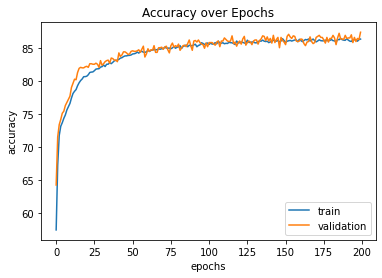

In [60]:
# Plot accuracy over epochs

plt.plot(np.array(Ann1.history['accuracy'])*100)
plt.plot(np.array(Ann1.history['val_accuracy']) *100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title('Accuracy over Epochs')
plt.legend(['train','validation'])
plt.show()

In [62]:
# Classification Report

print("Classification Report: \n")
print(classification_report(Y_test, Y_pred_f1))

Classification Report: 

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1593
           1       0.88      0.83      0.85      1593

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



In [63]:
# Recall score: Hit rate/ True positive rate
## Proportion of positives that are correctly identified.

recall_1 = round(recall_score(Y_test, Y_pred_f1) * 100, 3)
print("Recall score for this model: {}%".format(recall_1))

Recall score for this model: 83.302%


> The <b>Accuracy</b> of our base model is 85.719%. However, the goal of the model is to retain as many customers as possible, hence <b>Recall</b> is an important metric. We need to make sure that out of all the 1's predicted by the model, maximum of them are correct predictions of the churn. For our base model, we get recall = 83.302%.

## 3b. Other Models: 

> Let us try different methods of building ANN model before using gridsearchCV for hyper-parameter tuning.

In [65]:
# Model 2: Reducing the number of epochs (from epochs = 200 -> 100)

Model2 = Sequential()
Model2.add(Dense(units = 6, activation = 'relu', input_shape = (11,)))
Model2.add(Dense(units = 20, activation = 'relu'))
Model2.add(Dense(units = 1, activation = 'sigmoid'))
Model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
Model2.summary()

Ann2 = Model2.fit(X_train, Y_train,
                batch_size = 45,
                epochs = 100,
                validation_split = 0.10,
                verbose =0)

score2_train = Model2.evaluate(X_train, Y_train, verbose = 0)
#print("Training score: {}".format(score2_train))
score2_test = Model2.evaluate(X_test, Y_test, verbose = 0)
#print("\nTesting score: {}".format(score2_test))

print("\nTraining Score: {}%".format(round(score2_train[1]*100,3)))
print("\nTesting Score: {}%".format(round(score2_test[1]*100,3)))

Y_pred2 = Model2.predict(X_test)
Y_pred_f2 = np.where(Y_pred2 > 0.5, 1, 0)

Cm2 = confusion_matrix(Y_test, Y_pred_f2, labels = [1,0])
print("\nConfusion Matrix: ")
print(Cm2)

print("\nClassification Report: ")
print(classification_report(Y_test, Y_pred_f2))

accuracy2 = round(accuracy_score(Y_test, Y_pred_f2)*100,3)
print("\nAccuracy for this model: {}%".format(accuracy2))

recall_2 = round(recall_score(Y_test, Y_pred_f2) * 100, 3)
print("\nRecall score for this model: {}".format(recall_2))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 20)                140       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________

Training Score: 86.735%

Testing Score: 85.53%

Confusion Matrix: 
[[1264  329]
 [ 132 1461]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.92      0.86      1593
           1       0.91      0.79      0.85      1593

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.85     

In [66]:
# Model 3: 'sgd' optimizer instead of 'adam' while compiling model

Model3 = Sequential()
Model3.add(Dense(units = 6, activation = 'relu', input_shape = (11,)))
Model3.add(Dense(units = 20, activation = 'relu'))
Model3.add(Dense(units = 1, activation = 'sigmoid'))
Model3.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
Model3.summary()

Ann3 = Model3.fit(X_train, Y_train,
                batch_size = 45,
                epochs = 200,
                validation_split = 0.10,
                verbose =0)

score3_train = Model3.evaluate(X_train, Y_train, verbose = 1)
#print("Training score: {}".format(score3_train))
score3_test = Model3.evaluate(X_test, Y_test, verbose = 1)
#print("\nTesting score: {}".format(score3_test))

print("\nTraining Score: {}%".format(round(score3_train[1]*100,3)))
print("\nTesting Score: {}%".format(round(score3_test[1]*100,3)))

Y_pred3 = Model3.predict(X_test)
Y_pred_f3 = np.where(Y_pred3 > 0.5, 1, 0)

Cm3 = confusion_matrix(Y_test, Y_pred_f3, labels = [1,0])
print("\nConfusion Matrix: \n")
print(Cm3)

print("\nClassification Report: \n")
print(classification_report(Y_test, Y_pred_f3))

accuracy3 = round(accuracy_score(Y_test, Y_pred_f3)*100,3)
print("\nAccuracy for this model: {}%".format(accuracy3))

recall_3 = round(recall_score(Y_test, Y_pred_f3) * 100, 3)
print("Recall score for this model: {}".format(recall_3))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_7 (Dense)              (None, 20)                140       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 21        
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________
100/100 [==============================] - 0s 963us/step - loss: 0.3302 - accuracy: 0.8493

Training Score: 86.515%

Testing Score: 84.934%

Confusion Matrix: 

[[1342  251]
 [ 229 1364]]

Classification Report: 

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1593
           1       0.85      0.84      0.85      1593

    accu

In [67]:
# Model 4: Increasing batch size (from batch_size = 45 -> 200)

Model4 = Sequential()
Model4.add(Dense(units = 6, activation = 'relu', input_shape = (11,)))
Model4.add(Dense(units = 20, activation = 'relu'))
Model4.add(Dense(units = 1, activation = 'sigmoid'))
Model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
Model4.summary()

Ann4 = Model4.fit(X_train, Y_train,
                batch_size = 200,
                epochs = 200,
                validation_split = 0.10,
                verbose =0)

score4_train = Model4.evaluate(X_train, Y_train, verbose = 1)
#print("Training score: {}".format(score4_train))
score4_test = Model4.evaluate(X_test, Y_test, verbose = 1)
#print("\nTesting score: {}".format(score4_test))

print("\nTraining Score: {}%".format(round(score4_train[1]*100,3)))
print("\nTesting Score: {}%".format(round(score4_test[1]*100,3)))

Y_pred4 = Model4.predict(X_test)
Y_pred_f4 = np.where(Y_pred4 > 0.5, 1, 0)

Cm4 = confusion_matrix(Y_test, Y_pred_f4, labels = [1,0])
print("\nConfusion Matrix: \n")
print(Cm4)

print("\nClassification Report: \n")
print(classification_report(Y_test, Y_pred_f4))

accuracy4 = round(accuracy_score(Y_test, Y_pred_f4)*100,3)
print("\nAccuracy for this model: {}%".format(accuracy4))

recall_4 = round(recall_score(Y_test, Y_pred_f4) * 100, 3)
print("Recall score for this model: {}".format(recall_4))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_10 (Dense)             (None, 20)                140       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 21        
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________
100/100 [==============================] - 0s 889us/step - loss: 0.3277 - accuracy: 0.8462

Training Score: 86.319%

Testing Score: 84.62%

Confusion Matrix: 

[[1265  328]
 [ 162 1431]]

Classification Report: 

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1593
           1       0.89      0.79      0.84      1593

    accur

In [68]:
# Model 5: Change number of neurons in hidden layer (from units = 20 -> 6 for second hidden layer)

Model5 = Sequential()
Model5.add(Dense(units = 6, activation = 'relu', input_shape = (11,)))
Model5.add(Dense(units = 6, activation = 'relu'))
Model5.add(Dense(units = 1, activation = 'sigmoid'))
Model5.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

Ann5 = Model5.fit(X_train, Y_train,
                batch_size = 45,
                epochs = 200,
                validation_split = 0.10,
                verbose =0)

score5_train = Model5.evaluate(X_train, Y_train, verbose =1)
#print("Training score: {}".format(score5_train))
score5_test = Model5.evaluate(X_test, Y_test, verbose =1)
#print("\nTesting score: {}".format(score5_test))

print("\nTraining Score: {}%".format(round(score5_train[1]*100,3)))
print("\nTesting Score: {}%".format(round(score5_test[1]*100,3)))

Y_pred5 = Model5.predict(X_test)
Y_pred_f5 = np.where(Y_pred5 > 0.5, 1, 0)

Cm5 = confusion_matrix(Y_test, Y_pred_f5, labels = [1,0])
print("\nConfusion Matrix: \n")
print(Cm5)

print("\nClassification Report: \n")
print(classification_report(Y_test, Y_pred_f5))

accuracy5 = round(accuracy_score(Y_test, Y_pred_f5)*100,3)
print("\nAccuracy for this model: {}%".format(accuracy5))

recall_5 = round(recall_score(Y_test, Y_pred_f5) * 100, 3)
print("Recall score for this model: {}".format(recall_5))

100/100 [==============================] - 0s 932us/step - loss: 0.3295 - accuracy: 0.8487

Training Score: 85.934%

Testing Score: 84.871%

Confusion Matrix: 

[[1269  324]
 [ 158 1435]]

Classification Report: 

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1593
           1       0.89      0.80      0.84      1593

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186


Accuracy for this model: 84.871%
Recall score for this model: 79.661


In [69]:
# Model 6: Change number of hidden layers  

Model6 = Sequential()
Model6.add(Dense(units = 50, activation = 'relu', input_shape = (11,)))
Model6.add(Dense(units = 1, activation = 'sigmoid'))
Model6.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

Ann6 = Model6.fit(X_train, Y_train,
                batch_size = 45,
                epochs = 200,
                validation_split = 0.10,
                verbose =0)

score6_train = Model6.evaluate(X_train, Y_train, verbose =1)
#print("Training score: {}".format(score6_train))
score6_test = Model6.evaluate(X_test, Y_test, verbose =1)
#print("\nTesting score: {}".format(score6_test))

print("\nTraining Score: {}%".format(round(score6_train[1]*100,3)))
print("\nTesting Score: {}%".format(round(score6_test[1]*100,3)))

Y_pred6 = Model6.predict(X_test)
Y_pred_f6 = np.where(Y_pred6 > 0.5, 1, 0)

Cm6 = confusion_matrix(Y_test, Y_pred_f6, labels = [1,0])
print("\nConfusion Matrix: \n")
print(Cm6)

print("\nClassification Report: \n")
print(classification_report(Y_test, Y_pred_f6))

accuracy6 = round(accuracy_score(Y_test, Y_pred_f6)*100,3)
print("\nAccuracy for this model: {}%".format(accuracy6))

recall_6 = round(recall_score(Y_test, Y_pred_f6) * 100, 3)
print("Recall score for this model: {}".format(recall_6))

100/100 [==============================] - 0s 988us/step - loss: 0.2832 - accuracy: 0.8757

Training Score: 89.992%

Testing Score: 87.571%

Confusion Matrix: 

[[1353  240]
 [ 156 1437]]

Classification Report: 

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1593
           1       0.90      0.85      0.87      1593

    accuracy                           0.88      3186
   macro avg       0.88      0.88      0.88      3186
weighted avg       0.88      0.88      0.88      3186


Accuracy for this model: 87.571%
Recall score for this model: 84.934


In [70]:
# Model 7: Change activation function of hidden layer

Model7 = Sequential()
Model7.add(Dense(units = 6, activation = 'tanh', input_shape =(11,)))
Model7.add(Dense(units = 20, activation = 'tanh'))
Model7.add(Dense(units = 1, activation = 'sigmoid'))
Model7.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

Ann7 = Model7.fit(X_train, Y_train,
                batch_size = 45,
                epochs = 200,
                validation_split = 0.10,
                verbose =0)

score7_train = Model7.evaluate(X_train, Y_train, verbose =1)
#print("Training score: {}".format(score7_train))
score7_test = Model7.evaluate(X_test, Y_test, verbose =1)
#print("\nTesting score: {}".format(score7_test))

print("\nTraining Score: {}%".format(round(score7_train[1]*100,3)))
print("\nTesting Score: {}%".format(round(score7_test[1]*100,3)))

Y_pred7 = Model7.predict(X_test)
Y_pred_f7 = np.where(Y_pred7 > 0.5, 1, 0)

Cm7 = confusion_matrix(Y_test, Y_pred_f7, labels = [1,0])
print("\nConfusion Matrix: \n")
print(Cm7)

print("\nConfusion Matrix: \n")
print(classification_report(Y_test, Y_pred_f7))

accuracy7 = round(accuracy_score(Y_test, Y_pred_f7)*100,3)
print("\nAccuracy for this model: {}%".format(accuracy7))

recall_7 = round(recall_score(Y_test, Y_pred_f7) * 100, 3)
print("Recall score for this model: {}".format(recall_7))

100/100 [==============================] - 0s 969us/step - loss: 0.3081 - accuracy: 0.8616

Training Score: 87.127%

Testing Score: 86.158%

Confusion Matrix: 

[[1283  310]
 [ 131 1462]]

Confusion Matrix: 

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1593
           1       0.91      0.81      0.85      1593

    accuracy                           0.86      3186
   macro avg       0.87      0.86      0.86      3186
weighted avg       0.87      0.86      0.86      3186


Accuracy for this model: 86.158%
Recall score for this model: 80.54


## 3c. Summary:

In [73]:
recall = [recall_1, recall_2, recall_3, recall_4, 
          recall_5, recall_6, recall_7]

accuracy = [accuracy1,accuracy2, accuracy3, accuracy4,
            accuracy5, accuracy6, accuracy7]

features = ['Base Model', 'Reducing no. of epochs', "'sgd' optimizer", 'Increasing batch size',
            'Change no. of neurons in hidden layer', 'Change no. of hidden layers',
            'Change activation function of hidden layer']

train_score = [round(score1_train[1]*100,3), round(score2_train[1]*100,3), 
               round(score3_train[1]*100,3),round(score4_train[1]*100,3),
               round(score5_train[1]*100,3), round(score6_train[1]*100,3), 
               round(score7_train[1]*100,3)]
              
test_score = [round(score1_test[1]*100,3), round(score2_test[1]*100,3),
              round(score3_test[1]*100,3), round(score4_test[1]*100,3),
              round(score5_test[1]*100,3), round(score6_test[1]*100,3), 
              round(score7_test[1]*100,3)]

df = pd.DataFrame({'Models' : ['Model 1', 'Model 2', 'Model 3', 'Model 4',
                                'Model 5', 'Model 6', 'Model 7'],
                   'Model Description': features,
                   'Training score': train_score,
                   'Testing score': test_score,
                   'Accuracy' : accuracy,
                   'Recall' : recall})
df.set_index('Models', inplace = True)
df_acc = df.sort_values(by = 'Accuracy', ascending = False)
df_rec = df.sort_values(by = 'Recall', ascending = False)
print("Sorted by highest to lowest Accuracy: ")
df_acc

Sorted by highest to lowest Accuracy: 


Model Description  ...  Recall
Models                                               ...        
Model 6                 Change no. of hidden layers  ...  84.934
Model 7  Change activation function of hidden layer  ...  80.540
Model 1                                  Base Model  ...  83.302
Model 2                      Reducing no. of epochs  ...  79.347
Model 3                             'sgd' optimizer  ...  84.244
Model 5       Change no. of neurons in hidden layer  ...  79.661
Model 4                       Increasing batch size  ...  79.410

[7 rows x 5 columns]

> We have highest accuracy (87.57%) for Model 6, but the testing score (87.57%) is lower than training score (89.992%). Hence, we select the models with less variation in train/test scores i.e. Model 7, Model 1, Model 2. For the remaining models, train/test scores gets lower.  Next, among the three Models 7,1,2 we observe that Model 2 has lowest Recall which is important metric for this model. <b>Hence, Model 7 and Model 1 appear to be good options.</b>

In [74]:
print("Sorted by highest to lowest Recall: ")
df_rec

Sorted by highest to lowest Recall: 


Model Description  ...  Recall
Models                                               ...        
Model 6                 Change no. of hidden layers  ...  84.934
Model 3                             'sgd' optimizer  ...  84.244
Model 1                                  Base Model  ...  83.302
Model 7  Change activation function of hidden layer  ...  80.540
Model 5       Change no. of neurons in hidden layer  ...  79.661
Model 4                       Increasing batch size  ...  79.410
Model 2                      Reducing no. of epochs  ...  79.347

[7 rows x 5 columns]

> Here, we observe that Model 6 has the highest recall and highest accuracy, but the training score is higher than testing score, which means overfitting. Second highest recall is for Model 3, which has lower accuracy than Model 1 and also lower test score than train score. <b>Hence, we select Model 1 with similar train/test score (86.7%/ 85.7%), high accuracy = 85.719% and high recall = 83.302%. </b>

> Base Model (Model 1) has the following features:
- ANN neural network consists of 2 hidden layers, with neurons 6, 20 respectively and 'relu' activation function.
- It uses 1 neuron in output layer with 'sigmoid' activation function.
- The 'adam' optimizer is used with 'binary_crossentropy' loss function.
- Metric selected during compiling the model is 'accuracy'.
- Fit the model with training data using batch size = 45 and no. of epochs = 200. 
- Also, use 10% of training data for validation purpose during model fit.
 

# Step 5. Model Tuning

In [75]:
# Import libraries
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier

In [76]:
def __model(unit, opt):
  model = Sequential()
  model.add(Dense(units = 6, activation = 'relu', input_dim = 11))
  model.add(Dense(units = unit, activation = 'relu'))
  model.add(Dense(units = 1, activation = 'sigmoid'))
  model.compile(optimizer = opt,
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])
  return model 

In [77]:
model = KerasClassifier(build_fn= __model)

In [90]:
# GridSearch CV for hyper-parameter tuning
# Also 10-fold cross validation

from sklearn.model_selection import GridSearchCV

parameters = {'batch_size': [45,60],
              'nb_epoch': [100,200,400],
              'unit': [6, 20],
              'opt': ['adam', 'sgd']}

gridsearch = GridSearchCV(estimator = model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10)

gridsearch = gridsearch.fit(X_train, Y_train)
best_parameters = gridsearch.best_params_
best_accuracy = gridsearch.best_score_

print("\nBest parameters after GridSearchCV are: {}".format(best_parameters))
print("\nBest Accuracy after GridSearchCV: {}".format(best_accuracy))

213/213 [==============================] - 1s 1ms/step - loss: 0.6724 - accuracy: 0.5960

Best parameters after GridSearchCV are: {'batch_size': 60, 'nb_epoch': 400, 'opt': 'adam', 'unit': 20}

Best Accuracy after GridSearchCV: 0.6924646781789638


> Hence, best parameters for model 1 (base model) are batch_size = 60, epochs = 200, optimizer = 'adam' , units of 2nd hidden layer = 20 and best accuracy of 69%.

In [94]:
# Final Model after hyper-parameter tuning

# Build Model
Final_Model = Sequential()
Final_Model.add(Dense(units = 6, activation = 'relu', input_shape = (11,)))
Final_Model.add(Dense(units = 20, activation = 'relu'))
Final_Model.add(Dense(units = 1, activation = 'sigmoid'))

# Compile final model
Final_Model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

# Fit the final model
Final_Ann = Final_Model.fit(X_train, Y_train,
                batch_size = 60,
                epochs = 200,
                validation_split = 0.10, 
                verbose =0)

# Print Training & Testing Accuracy to check over-fit
Final_score_train = Final_Model.evaluate(X_train, Y_train, verbose =0)
Final_score_test = Final_Model.evaluate(X_test, Y_test, verbose =0)
print("\nTraining Score: {}%".format(round(Final_score_train[1]*100,3)))
print("\nTesting Score: {}%".format(round(Final_score_test[1]*100,3)))

# Predict for test set
Final_Y_pred = Final_Model.predict(X_test)
Final_Y_pred_f = np.where(Final_Y_pred > 0.5, 1, 0)

# Confusion Matrix
Final_Cm = confusion_matrix(Y_test, Final_Y_pred_f, labels = [1,0])
print("\nConfusion Matrix: \n")
print(Final_Cm)
print("\nClassification Report: \n")
print(classification_report(Y_test, Final_Y_pred_f))

# Print Accuracy & Recall Score
Final_accuracy = round(accuracy_score(Y_test, Final_Y_pred_f)*100,3)
print("\nAccuracy of Final Model: {}%".format(Final_accuracy))
Final_recall = round(recall_score(Y_test, Final_Y_pred_f) * 100, 3)
print("\nRecall score for this model: {}".format(Final_recall))


Training Score: 87.637%

Testing Score: 86.566%

Confusion Matrix: 

[[1305  288]
 [ 140 1453]]

Classification Report: 

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1593
           1       0.90      0.82      0.86      1593

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186


Accuracy of Final Model: 86.566%

Recall score for this model: 81.921


# Step 6. Model Evaluation

> We use <b>ROC curve</b> (Receiever Operating Characteristics curve) to further see the model performance for binary classification. we measure <b>AUC (Area under curve)</b> s.t. closer the AUC to 1, better the model. 

In [81]:
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [95]:
print(roc_auc_score(Y_test, Final_Y_pred_f))

0.8656622724419334


> In our case, the AUC  is 0.8656 which is good.

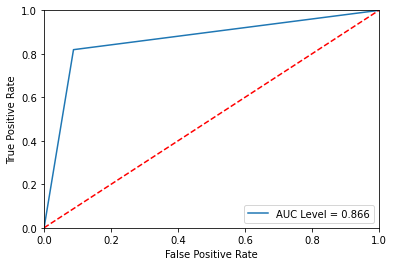

In [96]:
# Plotting roc curve

fpr, tpr, thresh = metrics.roc_curve(Y_test, Final_Y_pred_f)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='AUC Level = %0.3f' % (roc_auc))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

> The plot about shows that our ROC curve is closer to the perfect classifier towards upper left corner with higher TPR (True positive rate/benefits) for lower FPR(False Positive rates/costs). 

# 7. Conclusion

Confusion Matrix means:

<blockquote>*True Positive (observed=1,predicted=1):*

Predicted that customer churns/leaves bank and the customer actually churns/leaves bank. 

*False Positive (observed=0,predicted=1):*

Predicted that customer churns/leaves bank and the customer actually does not churns/leaves bank.

*True Negative (observed=0,predicted=0):*

Predicted that customer does not churns/leaves bank and the customer actually does not churns/leaves bank.

*False Negative (observed=1,predicted=0):*

Predicted that customer does not churns/leaves bank and the customer actually churns/leaves bank.  </blockquote>

The <u>Goal</u> here is to use the data collected from existing customers and build a model that will help the management team identify potential customers who are relatively more likely to churn/leave the bank(TP) and thus increase their hit ratio.

<u>Hit Ratio</u> is the number of times that a correct prediciton was made in ratio to the number of total predicitons.

- <b>Accuracy</b> simply measures how often the classifier makes the correct prediction. It’s the ratio between the number of correct predictions and the total number of predictions

- <b>Precision</b> answers the question: Out of the items that the classifier predicted to be true, how many are actually true? Whereas, <b>Recall</b> answers the question: Out of all the items that are true, how many are found to be true by the classifier?

Here, <b>False negative should be less i.e. there should be minimum cases when the model predicts that the customer will not churn/leave the bank but he/she actually churns/leaves the bank</b>. The Bank might loose a liable customer in this case. Hence, <u>Recall is the important metric.</u> Keeping in mind the high hit ratio, we need high accuracy score as well. 


> Selected Final Model has following features:
- SMOTE technique is used to oversample the data and get rid of class-imabalance in target variable.
- ANN neural network with 2 hidden layers with 6 and 20 neurons repectively and 'relu' activation function.
- 'adam' optimizer and 'binary_crossentropy' loss function is used while compiling.
- batch size = 60 and epochs = 200 during the fitting of the model.

> We get the following evaluation results:
- Training score = 87.637%,  Testing score = 86.566%
- Accuracy = 86.566%
- Recall = 81.921
- AUC score = 0.86566 (close to 1)